In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Define the two surfaces
def f1(x,y):
    return np.sin(x) + np.cos(y)

def f2(x,y):
    return x*y

In [4]:
# Generate the dataset
n = 5000
X = np.random.uniform(-5, 5, (n, 2))
y1 = f1(X[:,0], X[:,1])
y2 = f2(X[:,0], X[:,1])
y = np.vstack([y1, y2]).T

In [5]:
# Define the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

In [6]:
# Train the model
history = model.fit(X, y, epochs=50, validation_split=0.2)

Epoch 1/50
125/125 [==============================] - 2s 5ms/step - loss: 26.5201 - val_loss: 16.5461
Epoch 2/50
125/125 [==============================] - 0s 2ms/step - loss: 7.7911 - val_loss: 2.3506
Epoch 3/50
125/125 [==============================] - 0s 2ms/step - loss: 2.0571 - val_loss: 1.9560
Epoch 4/50
125/125 [==============================] - 0s 2ms/step - loss: 1.8909 - val_loss: 1.8627
Epoch 5/50
125/125 [==============================] - 0s 2ms/step - loss: 1.8041 - val_loss: 1.7805
Epoch 6/50
125/125 [==============================] - 0s 2ms/step - loss: 1.7240 - val_loss: 1.7315
Epoch 7/50
125/125 [==============================] - 0s 2ms/step - loss: 1.6492 - val_loss: 1.6111
Epoch 8/50
125/125 [==============================] - 0s 2ms/step - loss: 1.5382 - val_loss: 1.4894
Epoch 9/50
125/125 [==============================] - 0s 2ms/step - loss: 1.4298 - val_loss: 1.3738
Epoch 10/50
125/125 [==============================] - 0s 2ms/step - loss: 1.2855 - val_loss: 1.22

In [7]:
# Evaluate the model
loss = model.evaluate(X, y)
print("Mean Squared Error:", loss)


157/157 [==============================] - 0s 1ms/step - loss: 0.0324
Mean Squared Error: 0.03236139938235283


In [14]:

# Predict the surface intersection
X_test = np.mgrid[-5:5:50j, -5:5:50j].reshape(2,-1).T
y_pred = model.predict(X_test)

79/79 [==============================] - 0s 1ms/step


In [15]:
# Reshape the predicted values for plotting
z1_pred = y_pred[:,0].reshape(50,50)
z2_pred = y_pred[:,1].reshape(50,50)

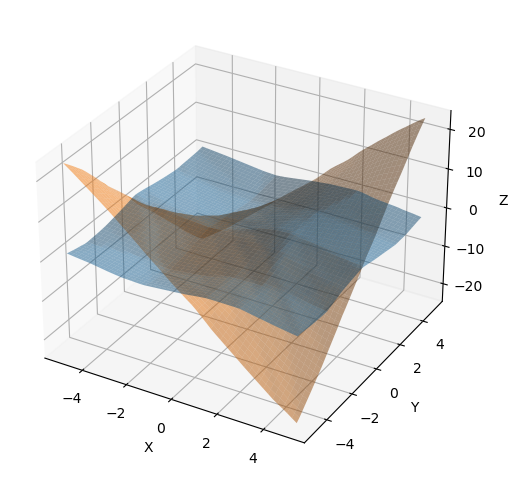

In [16]:
# Plot the 3D surface intersection
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), z1_pred, alpha=0.5)
ax.plot_surface(X_test[:,0].reshape(50,50), X_test[:,1].reshape(50,50), z2_pred, alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

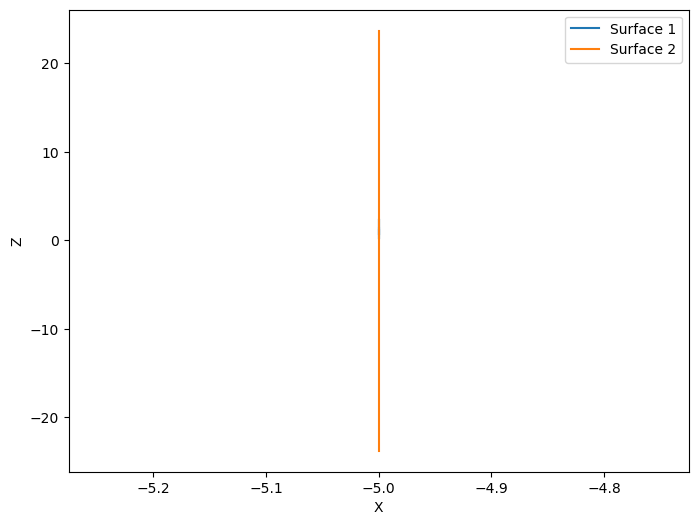

In [18]:
# Reshape X_test
x = X_test[:,0].reshape(50,50)

# Plot the 2D curve intersection
fig = plt.figure(figsize=(8,6))
plt.plot(x[0], z1_pred[0], label='Surface 1')
plt.plot(x[0], z2_pred[0], label='Surface 2')
plt.xlabel('X')
plt.ylabel('Z')
plt.legend()
plt.show()

In [21]:
from scipy.optimize import root
import numpy as np

def equations(vars, f1, f2):
    x, y, z = vars
    return [f1(x, y, z) - z, f2(x, y, z) - z, x**2 + y**2 - 1]  # add extra equation x^2 + y^2 = 1 for 2D intersection

# Define the surfaces as functions
f1 = lambda x, y, z: np.sin(x) + np.cos(y) - z + np.sin(z/y)
f2 = lambda x, y, z: x*y - z

# Initial guess for the intersection point
guess = np.array([1.0, 1.0, 1.0])

# Find the intersection point using scipy.optimize.root
sol = root(equations, guess, args=(f1, f2))

# Print the equation of the curve intersection
x, y, z = sol.x
print(f"Equation of curve intersection: x = {x:.4f}, y = {y:.4f}, z = {z:.4f}")


Equation of curve intersection: x = -0.9411, y = 0.3381, z = -0.1591
